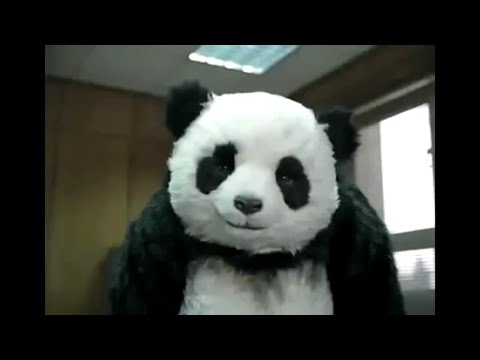

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("hlmsjstN6Aw")

# We're not saying "no" to Pandas, but first...
* Connect to a Postgres server 
    * in python 
        * using psycopg2
* Understand psycopg2's "cursors"
    * executes
    * commits
* Generate dynamic queries

# psycopg2 is a python/postgreSQL server interface

In [2]:
# install homebrew: http://brew.sh

# brew cask install postgres -> double click -> applications
### not needed ### brew cask install pgadmin4 -> double click -> applications, click plug
# brew tap homebrew/services
# brew services start postgresql

# https://github.com/zipfian/welcome/blob/master/notes/postgres_setup.md

# pip install psycopg2
# conda install psycopg2
import psycopg2

In [ ]:
# https://github.com/zipfian/precourse/tree/master/Chapter_3_SQL/data
# psql -f stuff/beds.sql

# Step 1: open a connection

In [3]:
# ALTER USER schwarls37 ENCRYPTED PASSWORD 'need a password';

conn = psycopg2.connect(dbname='schwarls37',port=5432,password="",
                        user='schwarls37',host='localhost')

# host could be a remote database as well

<table align="center">
<tr>
<td><img src="stuff/whywouldyoudothat1.jpg" width="300px" align="center"></td> 
<td><img src="stuff/whywouldyoudothat2.jpg" width="415px" align="center"></td> 
</tr>
</table>
<table align="center">
<tr>
<td><img src="stuff/whywouldyoudothat3.jpg" width="400px" align="center"></td> 
<td><img src="stuff/whywouldyoudothat4.jpg" width="305px" align="center"></td> 
</tr>
</table>

## Allows us to combine data sources in one place
* Can use python to simultaneously pull data from other databases as well 
    * mysql-connector-python (MySql)
    * sqlite (SQLite)
    * pymongo (MongoDB)
    * sqlalchemy (all the things)
    * [psychopg2 (postgreSQL), obviously]

## Allows us to bring other python tools to bear
* DataFrames and associated functionality, Machine Learning tools, etc.

## Allows for easy dynamic query generation
* And hence, automation

# Step 2: create a cursor object

In [4]:
cur = conn.cursor()
#cur.close()

# The cursor interfaces and traverses the database 
# We don't have to worry about how it does it
# Queries are returned as (single iteration) generators 

# Step 3: execute some SQL queries

In [32]:
query = '''SELECT "facility_name", "available_residential_beds" 
           FROM Beds 
           WHERE "city" = 'Cuba' 
           LIMIT 10;'''

cur.execute(query)

In [31]:
# If you see this error 

print "InternalError: current transaction is aborted, commands ignored until end of transaction block"

# Then the cursor is chocking on a current command 
# and it needs to be aborted with: conn.rollback()

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [33]:
for row in cur:
    print row

('Cuba Memorial Hospital Inc SNF', '4')
('Cuba Memorial Hospital Inc SNF', '3')
('Cuba Memorial Hospital Inc SNF', '4')
('Cuba Memorial Hospital Inc SNF', '3')
('Cuba Memorial Hospital Inc SNF', '5')
('Cuba Memorial Hospital Inc SNF', '4')
('Cuba Memorial Hospital Inc SNF', '6')
('Cuba Memorial Hospital Inc SNF', '5')
('Cuba Memorial Hospital Inc SNF', '5')
('Cuba Memorial Hospital Inc SNF', '5')


In [34]:
for row in cur:
    print row
    
# See, I told you: cur saves results as a (one pass) generator    

In [ ]:
# Other options for iterating through the generator

# cur.fetchone(), or cur.next()
# cur.fetchmany(n)
# cur.fetchall()

In [35]:
query = '''ALTER TABLE Beds 
           RENAME COLUMN "available_residential_beds" 
           TO "Available Residential Beds"'''

cur.execute(query)

# Step 4: commit SQL actions 
### (to actually make the changes to the DB permanent)

In [36]:
conn.commit()
# conn.autocommit = True

# database level operations are also available

In [37]:
query = '''ALTER TABLE Beds 
           RENAME COLUMN "Available Residential Beds" 
           TO "available_residential_beds"'''
cur.execute(query)
conn.commit()

# $$\textbf{Sanitize your queries}$$

<table align="center">
<tr><td>
<img src="stuff/exploits_of_a_mom.png" width="600px" align="center"> 
</tr></td>
</table>

In [ ]:
my_name = "Scott"
unsafe_query = '''SELECT * FROM Users 
                  WHERE Name = ''' + my_name

# what if...
my_name = "Scott; DROP TABLE Users"

# This is called SQL Injection and it's obviously risky

In [ ]:
# Instead 
my_name = "Scott; DROP TABLE Users"

cur.execute('''SELECT * FROM Users WHERE Name = %s''', my_name)

# will search for rows in Name *exactly* equal to 'Scott; DROP TABLE Users'

# Step 5: close the connection

In [38]:
cur.close() # optional, automatically close with conn.close()
conn.close()

In [39]:
# Or... 

# just read directly into a pandas data frame... which we shall begin learning about: now.

conn = psycopg2.connect(dbname='schwarls37',port=5432,password="",
                        user='schwarls37',host='localhost')


import pandas as pd
query = '''SELECT "facility_name", "available_residential_beds" 
           FROM Beds 
           WHERE "city" = 'Cuba' 
           LIMIT 10;'''
rows = pd.read_sql_query(query, conn)
conn.close()

rows

,facility_name,available_residential_beds
0,Cuba Memorial Hospital Inc SNF,4
1,Cuba Memorial Hospital Inc SNF,3
2,Cuba Memorial Hospital Inc SNF,4
3,Cuba Memorial Hospital Inc SNF,3
4,Cuba Memorial Hospital Inc SNF,5
5,Cuba Memorial Hospital Inc SNF,4
6,Cuba Memorial Hospital Inc SNF,6
7,Cuba Memorial Hospital Inc SNF,5
8,Cuba Memorial Hospital Inc SNF,5
9,Cuba Memorial Hospital Inc SNF,5


# $$\textit{pandas}$$
$$\text{Schwartz}$$

## $$\textbf{They're not on the endangered species list any more}$$
# $$\textbf{How China saved the Giant Panda}$$

As of September 2016 the International Union for the Conservation of Nature (IUCN) has taken the global icon off the endangered species list. The giant panda is now listed as "vulnerable" as opposed to "endangered". Thanks to Chinese conservation efforts the Giant Panda population has increased to approximately 2,000 individuals up from a low of about 1,000 in the 1970's when the species was at the most risk.  This population increase has been the result of bamboo forest restoration projects and the incorporation of improved captive breeding and husbandry methods -- initiatives driven by a better understanding of Giant Panda physiology and behaviour. Challenges remain, however. Climate change is predicted to wipe out more than one-third of the panda's bamboo habitat in the next 80 years, and reintroduction of captive-bred pandas into the wild remains challenging. 

<table align="center">
<tr><td>
<img src="stuff/pandas.png" width="600px" align="center"> 
</tr></td>
</table>

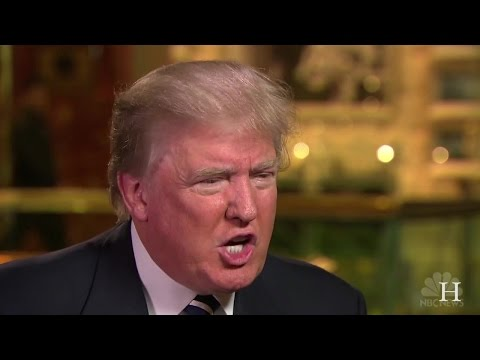

In [40]:
from IPython.display import YouTubeVideo
YouTubeVideo("RDrfE9I8_hs")


# QUIZ

* 1:
* 2:
* 3:
* 4:
* 5:
* Bonus #1:
* Bonus #2:


# Pandas are cute cuddly animals
* They are also the Flying Circus' answer to Excel and R Data Frames
* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

# Objectives
* psycopg2
    * obviously the quizze stuff above
* numpy
    * Speed
    * Broadcasting
* Pandas Series
    * Pandas Time Series Type
* Pandas DataFrames
    * Creating and destroying columns
    * Merging/Joining DataFrames
    * Concatenating/Appening DataFrames
    * Sorting
    * Accessing data
    * Manipulating the DataFrame Index    
* Exploratory Data Analysis (EDA) with Matplotlib and Pandas 
    * Grouping/Aggregation
    * Creating pivot tables
    * Applying functions/plotting

# Pandas is very functional

<table align="center">
<tr>
<td><img src="stuff/panda7.jpg" width="300px" align="center"></td> 
<td><img src="stuff/panda2.jpg" width="180px" align="center"></td> 
<td><img src="stuff/panda6.jpg" width="475px" align="center"></td> 
<tr><td>Killer Panda</td><td>Red Handed Panda</td><td>Sexy Panda</td></tr>


</tr>
</table>
<table align="center">
<tr>

<td><img src="stuff/panda4.jpg" width="230px" align="center"></td> 
<td><img src="stuff/panda3.jpg" width="300px" align="center"></td> 
<td><img src="stuff/panda1.jpg" width="205x" align="center"></td> 
<td><img src="stuff/panda8.jpg" width="210px" align="center"></td> 
<tr><td>Lone Ranger Panda</td><td>Assisted Pushup Panda</td><td>Acrobat Panda (Beginner)</td><td>Acrobat Panda (Advanced)</td></tr>
</tr>
</table>

# (Standard Library) Lists
* concatenate

In [41]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

# Numpy NdArrays
* operate elementwise

In [42]:
import numpy as np

In [43]:
np.array([1,2,3]) + np.arange(3) + np.linspace(10,12,3)

array([ 11.,  14.,  17.])

# Numpy NdArrays

* have types

In [44]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF"])

print ints.dtype, chars.dtype, strings.dtype

int64 |S1 |S3


# Speed

https://ipython.org/ipython-doc/3/interactive/magics.html

In [45]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

print "python list"
time = %timeit -r 1 -o sum(python_list)
print time.all_runs[0]/time.loops 

print "\n" + "numpy array"
time = %timeit -r 1 -o np.sum(numpy_array)
print time.all_runs[0]/time.loops

print "\n" + "numpy array -- standard library sum"
time = %timeit -r 1 -o sum(numpy_array)
print time.all_runs[0]/time.loops

python list
100 loops, best of 1: 10.1 ms per loop
0.0101156687737

numpy array
1000 loops, best of 1: 727 µs per loop
0.000726588010788

numpy array -- standard library sum
10 loops, best of 1: 85.9 ms per loop
0.0859349966049


# Broadcasting

http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

In [47]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print a.shape, b.shape 
print "\n"
print a + b

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations
# cool.

(2, 1) (2, 2)


[[ 11  12]
 [-11 -12]]


In [48]:
a = np.array([[10, 0, -10, 0],[-10, 0, -10, 0]]) 
b = np.array([[2,2],[-1,0]]) 
print a.shape, b.shape 
print ""
print a + b

# it's not clear how it should fill up in this case... so it can't/doesn't

(2, 4) (2, 2)



ValueError: operands could not be broadcast together with shapes (2,4) (2,2) 

# Dimension Dimentia...

In [54]:
a = 10
a = np.array(10)
a = np.array([10])
a = np.array([[[10]]])
a = np.array([[10],[10]])
b = np.array([[1,2],[-1,-2]])

print a.shape, b.shape
print "\n"
print a + b

(2, 1) (2, 2)


[[11 12]
 [ 9  8]]


In [ ]:
# Notes:

# a.shape can be assigned into to change the shape with compatible shapes
# a.reshape() can be used to change shape as well to compatible shapes 

# see also a.flatten() and a.ravel(), which leads us to the following... 

# Aliasing Amnesia... 
* *Copy* versus *View* (and not accidentally editing another variables memory)


In [58]:
z = [1, 2, 3, 4, 5]
zz = z[2:]
zz[0]=11
z

[11, 2, 3, 4, 5]

In [63]:
b = np.array([[1,2],[-1,-2]])
print b
print ""

c = b.copy()# #[:,:]#
# also see "deepcopy()"
c[0,0]=666

print c
print ""
print b

[[ 1  2]
 [-1 -2]]

[[666   2]
 [ -1  -2]]

[[ 1  2]
 [-1 -2]]


# Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**


In [64]:
import pandas as pd

In [65]:
series = pd.Series([5775,373,7,42,np.nan,33])
print series
print "\n"
print series.shape

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [68]:
world_series = pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...", None])
world_series

0      cubs
1    royals
2    giants
3       sox
4    giants
5     cards
6    giants
7       ...
dtype: object

# Pandas Date Series
* are fancy: http://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [70]:
bdays = pd.date_range(start='19821107', periods=34+1, freq=pd.DateOffset(years=1))
bdays#.shape

(35,)

### After you learn Pandas you might care about using Date Series Types and the following could be useful:
* df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
* df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))



# Pandas DataFrames
* are a set of Pandas Series **that share the same index** 
<br>
<br>

$$\large \text{Python List} \subset \text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame}$$
<br>

In [73]:
mixedTypes_df = pd.DataFrame({ '0' : [np.nan] + 3 * [1.],
                               'b' : pd.Timestamp('20130102'),
                               'C' : pd.Series(3, index=list(range(4)), dtype='float32'),
                               '1' : np.array(4 * [1], dtype='int32'),
                                2  : pd.Categorical(["train", "test", "validate", "win"]),
                                3 : 2*[np.nan, 'foo'] }) #, index=bdays[:4]
print mixedTypes_df
print ""
print mixedTypes_df.shape
print ""
mixedTypes_df.dtypes

          2    3    0  1    C          b
0     train  NaN  NaN  1  3.0 2013-01-02
1      test  foo  1.0  1  3.0 2013-01-02
2  validate  NaN  1.0  1  3.0 2013-01-02
3       win  foo  1.0  1  3.0 2013-01-02

(4, 6)



2          category
3            object
0           float64
1             int32
C           float32
b    datetime64[ns]
dtype: object

# Managing Columns

In [74]:
mixedTypes_df.rename(columns={'b': 'B'}, inplace=True)
mixedTypes_df

,2,3,0,1,C,B
0,train,NaN,NaN,1,3.0,2013-01-02
1,test,foo,1.0,1,3.0,2013-01-02
2,validate,NaN,1.0,1,3.0,2013-01-02
3,win,foo,1.0,1,3.0,2013-01-02


In [75]:
mixedTypes_df['1']

0    1
1    1
2    1
3    1
Name: 1, dtype: int32

In [76]:
type(mixedTypes_df['1'])

pandas.core.series.Series

In [77]:
type(mixedTypes_df)

pandas.core.frame.DataFrame

In [78]:
del mixedTypes_df['1']
mixedTypes_df

,2,3,0,C,B
0,train,NaN,NaN,3.0,2013-01-02
1,test,foo,1.0,3.0,2013-01-02
2,validate,NaN,1.0,3.0,2013-01-02
3,win,foo,1.0,3.0,2013-01-02


In [79]:
mixedTypes_augmented_df = mixedTypes_df.copy() # de-referencing

mixedTypes_df.index = bdays[:4]

mixedTypes_augmented_df[2] = mixedTypes_augmented_df[2] + np.array([", I"]*4) # element-wise
mixedTypes_augmented_df[2] = mixedTypes_augmented_df[2] + " must" # broadcasting
mixedTypes_augmented_df['G'] = 'hommies' # broadcasting

print "mixedTypes_df"
print mixedTypes_df
print "\n"+"mixedTypes_augmented_df"
print mixedTypes_augmented_df

mixedTypes_df
                   2    3    0    C          B
1982-11-07     train  NaN  NaN  3.0 2013-01-02
1983-11-07      test  foo  1.0  3.0 2013-01-02
1984-11-07  validate  NaN  1.0  3.0 2013-01-02
1985-11-07       win  foo  1.0  3.0 2013-01-02

mixedTypes_augmented_df
                  2    3    0    C          B        G
0     train, I must  NaN  NaN  3.0 2013-01-02  hommies
1      test, I must  foo  1.0  3.0 2013-01-02  hommies
2  validate, I must  NaN  1.0  3.0 2013-01-02  hommies
3       win, I must  foo  1.0  3.0 2013-01-02  hommies


# Accessing Data part I: skeletons
* is kind of special in Pandas

In [93]:
# getting columns
b = mixedTypes_augmented_df["G"]
mixedTypes_augmented_df.G#.tolist()#values#.

0        pal
1    hommies
2    hommies
3    hommies
Name: G, dtype: object

In [88]:
print mixedTypes_df.index
print ""
print mixedTypes_df.index.values.dtype # type()
print ""
print mixedTypes_df.index.tolist()

DatetimeIndex(['1982-11-07', '1983-11-07', '1984-11-07', '1985-11-07'], dtype='datetime64[ns]', freq='<DateOffset: kwds={'years': 1}>')

datetime64[ns]

[Timestamp('1982-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>'), Timestamp('1983-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>'), Timestamp('1984-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>'), Timestamp('1985-11-07 00:00:00', offset='<DateOffset: kwds={'years': 1}>')]


In [94]:
print mixedTypes_df.columns
print ""
print mixedTypes_df.columns.values #.dtype
print ""
print mixedTypes_df.columns.tolist()

Index([2, 3, u'0', u'C', u'B'], dtype='object')

[2 3 '0' 'C' 'B']

[2, 3, '0', 'C', 'B']


# Accessing Data part II: innards
* is kind of special in Pandas

In [95]:
np.ones((10,10))[:3,:3]

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [96]:
zeros_ndarray = np.zeros((3,4))        # Create a matrix of zeros with 3 rows and 4 columns. 
ones_ndarray = np.ones((10,20))        # Create a matrix of ones with 10 rows and 20 columns.
identity_ndarray = np.identity(50)     # Create an identity matrix with 50 rows and 50 columns. 
random_ndarray = np.random.rand(2, 2)  # Create a 2x2 array of random floats ranging from 0 to 1. 
range_ndarray = np.arange(0, 20, 0.5)  # Create a numpy array with arguments (start, end, step_size). 
noise_nparray = np.random.randn(35, 6) # Create a 35x6 array of normally distributed random normal variables

identity_ndarray[:3,:3]

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [99]:
mixedTypes_df.head()
mixedTypes_df[:3,:3]
# is mixedTypes_df a matrix?

TypeError: unhashable type

In [101]:
print mixedTypes_df.values[:3,:3] 
#mixedTypes_df.as_matrix() # type(

# are these the same?

[['train' nan nan]
 ['test' 'foo' 1.0]
 ['validate' nan 1.0]]


In [108]:
# getting columns
mixedTypes_df[[2,3,"0","B"]]

,2,3,0,B
1982-11-07,train,NaN,NaN,2013-01-02
1983-11-07,test,foo,1.0,2013-01-02
1984-11-07,validate,NaN,1.0,2013-01-02
1985-11-07,win,foo,1.0,2013-01-02


In [114]:
# getting rows
print bdays[1]
mixedTypes_df[:bdays[1]] # hint: "slice"

1983-11-07 00:00:00


,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02


In [115]:
mixedTypes_df

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02
1984-11-07,validate,NaN,1.0,3.0,2013-01-02
1985-11-07,win,foo,1.0,3.0,2013-01-02


In [125]:
# Quiz 1
#-------
mixedTypes_df[:1]
mixedTypes_df[2:3]
mixedTypes_df[[2,3]]
mixedTypes_df[2]
#mixedTypes_df[1]
#mixedTypes_df[0]
mixedTypes_df['0']

1982-11-07    NaN
1983-11-07    1.0
1984-11-07    1.0
1985-11-07    1.0
Freq: <DateOffset: kwds={'years': 1}>, Name: 0, dtype: float64

In [126]:
mixedTypes_df = mixedTypes_df.reset_index()
mixedTypes_df

,index,2,3,0,C,B
0,1982-11-07,train,NaN,NaN,3.0,2013-01-02
1,1983-11-07,test,foo,1.0,3.0,2013-01-02
2,1984-11-07,validate,NaN,1.0,3.0,2013-01-02
3,1985-11-07,win,foo,1.0,3.0,2013-01-02


In [128]:
# Quiz 2
#-------

mixedTypes_df[:1]
mixedTypes_df[2:3]
mixedTypes_df[[2,3]]
#mixedTypes_df[2]
#mixedTypes_df[1]
#mixedTypes_df[0]
#mixedTypes_df['0']

,2,3
0,train,NaN
1,test,foo
2,validate,NaN
3,win,foo


In [129]:
mixedTypes_df

,index,2,3,0,C,B
0,1982-11-07,train,NaN,NaN,3.0,2013-01-02
1,1983-11-07,test,foo,1.0,3.0,2013-01-02
2,1984-11-07,validate,NaN,1.0,3.0,2013-01-02
3,1985-11-07,win,foo,1.0,3.0,2013-01-02


In [130]:
mixedTypes_df = mixedTypes_df.set_index('index')
del mixedTypes_df.index.name
mixedTypes_df

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02
1984-11-07,validate,NaN,1.0,3.0,2013-01-02
1985-11-07,win,foo,1.0,3.0,2013-01-02


# Accessing Data part III: open sesame and abracadabra
* is kind of special in Pandas

# The *.loc*

In [139]:
mixedTypes_df.loc[:,["B","C"]] # hint: :,
mixedTypes_df.loc[bdays[1]:bdays[3],["B","C"]] # hint: bdays[1]:bdays[3]
mixedTypes_df.loc[bdays[3],["B","C"]] # hint: bdays[3]
mixedTypes_df.loc[:,[2,3]] # hint: "

,2,3
1982-11-07,train,NaN
1983-11-07,test,foo
1984-11-07,validate,NaN
1985-11-07,win,foo


# The *.iloc*
* as opposed to the *.loc*

In [142]:
mixedTypes_df

,2,3,0,C,B
1982-11-07,train,NaN,NaN,3.0,2013-01-02
1983-11-07,test,foo,1.0,3.0,2013-01-02
1984-11-07,validate,NaN,1.0,3.0,2013-01-02
1985-11-07,win,foo,1.0,3.0,2013-01-02


In [145]:
mixedTypes_df.iloc[2:4,2:4]
mixedTypes_df.iloc[:bdays[3],["B","C"]]

,B,C
1982-11-07,2013-01-02,3.0
1983-11-07,2013-01-02,3.0
1984-11-07,2013-01-02,3.0
1985-11-07,2013-01-02,3.0


# The *.ix*
* as opposed(?) to the *.loc* and the *.iloc*

In [ ]:
mixedTypes_df

In [ ]:
print mixedTypes_df.ix[:3,1:3]
print ""
print mixedTypes_df.ix[:bdays[3],1:3]
print ""
print mixedTypes_df.ix[:3,['B','C']]
print ""
print mixedTypes_df.ix[:bdays[3],[2,3]]

# The *.at/.iat*?
* gets you a single scalar. fast.

# Pandas talks to all sorts of data types
## SQL, csv, .xlsx, pickle, etc.
* http://pandas.pydata.org/pandas-docs/stable/io.html
* https://docs.python.org/2/library/pickle.html

In [ ]:
Schools_df = pd.read_csv("stuff/Schools.csv")
Schools_df.head()

# Applying functions to Data
## A.K.A., transforming data, doing stuff to data, etc.
<br>
$$\LARGE \text{NumPy Array} \subset \text{Pandas Series} \subset \text{Pandas DataFrame}$$

* http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

# Filtering (i.e., row selecting or boolean indexing)

In [ ]:
# & | ~ == != VERSUS and or not equals

Schools_df[(Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) 
           | ((Schools_df.schoolCity.astype(str) == "Austin") & 
              (Schools_df["schoolName"].astype(str) != "University of Texas at Austin")) ]

In [ ]:
kp = (Schools_df.schoolState.isin(["TX"]) & Schools_df.schoolNick.str.contains("Tigers")) | \
    ((Schools_df.schoolCity.astype(str) == "Austin") & ~(Schools_df.schoolName.astype(str) == "University of Texas at Austin"))

print Schools_df.ix[kp, ["schoolName","schoolNick"]]
print ""
print Schools_df.loc[kp, "schoolName":"schoolNick"]
print ""
print Schools_df.iloc[kp ,1:2]

In [ ]:
pd.DataFrame(Schools_df[Schools_df.schoolNick.notnull() & Schools_df.schoolState.isin(["TX"])].schoolNick.reshape(5,8))

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [ ]:
print mixedTypes_df
print ""
print mixedTypes_df.dropna(how='any') # subset=['0'], inplace=True
print ""
print mixedTypes_df

In [ ]:
mixedTypes_df[3]= mixedTypes_df[3].fillna(value="I pity the")
print mixedTypes_df

# Group By
* Aggregate, Apply
* http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [ ]:
Schools_df.groupby(['schoolState'])[['schoolID']].count().head()
#Schools_df.schoolState.value_counts()

# Pivot Tables
* http://pandas.pydata.org/pandas-docs/version/0.15.2/reshaping.html#pivot-tables-and-cross-tabulations

In [ ]:
nicknames_states = pd.crosstab(Schools_df.schoolNick, Schools_df.schoolState) 
nicknames_states.ix["Tigers":"Vandals","IN":"VA"]

# More Aggregations

In [ ]:
nicknames_states['total'] = nicknames_states.T.sum() # axis=1
nicknames_states.head()

In [ ]:
nicknames_states.loc['total'] = (nicknames_states.sum(axis=0).values)
nicknames_states.tail()

# Sorting

In [ ]:
nicknames_states.sort_values(axis=0, by=['total'], ascending=False).head()

In [ ]:
posts_df = pd.read_csv('stuff/PostsForAnalysis.txt')
users_df = pd.read_csv('stuff/UsersForAnalysis.txt')
posts_df.describe()

# Discretization

In [ ]:
print posts_df.comments_count.quantile([0, .25, .5, .75, 1])
print ""
print pd.qcut(posts_df.comments_count, [0, .25, .5, .75, 1])[:5]
print ""
print pd.cut(posts_df.comments_count, 5)[:5]

# .apply - more Aggregations and Transformations
* [Guru God Level Extra Credit] Transform versus Apply -- what's the difference?
* see also: df.isnull, df.notnull, pd.isnull, pd.notnull
* etc.

In [ ]:
# show combining columns 
((posts_df.comments_count/posts_df.votes_count)*np.log(posts_df.votes_count))[:5]

In [ ]:
users_df.twitter_username.unique()

In [ ]:
users_df.headline.apply(lambda x: "Boss" if "founder" in str(x).lower() or "ceo" in str(x).lower() else "Nots")[:5]

In [ ]:
users_df[:10].created_at.apply(pd.to_datetime).apply(lambda x: (x - pd.to_datetime('2013-11-21T23:06:54.070-08:00')) / np.timedelta64(1, 'D')).apply(int)

In [ ]:
from scipy.stats import mode
posts_df.ix[:, "date":"time_of_day"].apply(mode)

# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html
* adding *columns*
* see also: df.join
* Inner, Left, Right, Outer...

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'foo','post'], 'rval': ["A", "B", "C"]})

print "X"
print left
print "\n" + "Y"
print right
print "\n" + "X outer join Y"
print pd.merge(left, right, on='key', how='outer')
print "\n" + "X inner join Y"
print pd.merge(left, right, on='key', how='inner')
print "\n" + "X left join Y"
print pd.merge(left, right, on='key', how='left')
print "\n" + "X right join Y"
print pd.merge(left, right, on='key', how='right')

In [ ]:
posts_users_df = pd.merge(posts_df, users_df, on='user_id')
posts_users_df.head()

# Concatenating
* adding *rows*
* see also: df.append()

In [ ]:
pd.concat([posts_users_df[:3],posts_users_df[-3:]], axis=0)

In [ ]:
pd.concat([posts_users_df[["id","date","day"]],posts_users_df[["headline","twitter_username","website_url"]]], axis=1).head()

# Multi-Indexing
* group by structuring

In [ ]:
index = pd.MultiIndex.from_tuples(names=['first', 'second'],
            tuples = list(zip(['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                              ['one', 'two', 'one', 'two','one', 'two', 'one', 'two'])))
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

In [ ]:
stacked = df.stack()
stacked

In [ ]:
stacked.unstack() #.unstack() 

In [ ]:
stacked.unstack(0)

In [ ]:
stacked.unstack(0).T

# Plotting
* for good, not evil
* http://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org
* http://matplotlib.org/users/style_sheets.html
* https://stanford.edu/~mwaskom/software/seaborn/ 
* http://bokeh.pydata.org/en/latest/

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pylab
pylab.rcParams['figure.figsize']=(6,5)

In [ ]:
import matplotlib
matplotlib.style.use('classic')
#matplotlib.style.use('ggplot')
#print plt.style.available 

In [ ]:
zeros_ndarray = np.zeros((3,4))        # Create a matrix of zeros with 3 rows and 4 columns. 
ones_ndarray = np.ones((10,20))        # Create a matrix of ones with 10 rows and 20 columns.
identity_ndarray = np.identity(50)     # Create an identity matrix with 50 rows and 50 columns. 
random_ndarray = np.random.rand(2, 2)  # Create a 2x2 array of random floats ranging from 0 to 1. 
range_ndarray = np.arange(0, 20, 0.5)  # Create a numpy array with arguments (start, end, step_size). 
noise_nparray = np.random.randn(35,6)  # Create a 35x6 array of normally distributed random normal variables

noise_df = pd.DataFrame(noise_nparray, index=bdays, columns=list('ABC123'))
for i in range(6):
    noise_df.iloc[i,i] = np.nan
    
random_walk_df = noise_df.apply(np.cumsum)
standarized_walk_df = (random_walk_df - random_walk_df.mean()) / random_walk_df.std()

In [ ]:
standarized_walk_df = standarized_walk_df.reset_index()
print standarized_walk_df
del standarized_walk_df['index'] # or df.drop('index', inplace=True, axis=1)

standarized_walk_df.plot()

In [ ]:
plt.figure()
random_walk_df.hist()
plt.tight_layout()

In [ ]:
random_walk_df.plot(kind='box')

In [ ]:
pylab.rcParams['figure.figsize']=(17,5)
random_walk_df.plot(kind='bar')
pylab.rcParams['figure.figsize']=(7,5)

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(random_walk_df, alpha=0.9, figsize=(10, 10), diagonal='kde')
pylab.rcParams['figure.figsize']=(6,5)



# When will I ever even have to use Pandas? 

"Is it when I need a team of hardy animals to pull me across the expansive frozen tundra in a sled?"

<br>
# Answer: all the time.
So you might as well get good at it sooner rather than later... 

### Some other "Intro To Pandas" notebooks that I like a lot
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/sallamander/numpy_notes.ipynb
* https://github.com/zipfian/DSI_Lectures/blob/master/pandas/numpy_pandas.ipynb  
* http://pandas.pydata.org/pandas-docs/stable/10min.html

### The Official Documentation
* http://pandas.pydata.org/pandas-docs/stable/index.html

### An In-House Cheat Sheet
* https://github.com/zipfian/precourse/tree/master/Chapter_4_Pandas#functions-i-use-all-the-time